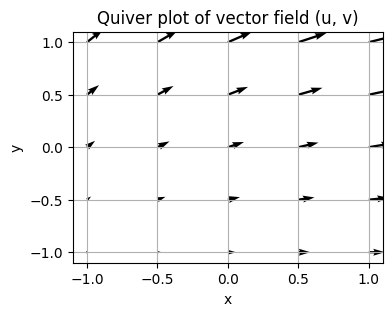

tensor([[0.5000, 0.5000, 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000, 0.5000, 0.5000]], grad_fn=<SelectBackward0>) tensor([[0.5000, 0.5000, 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000, 0.5000, 0.5000]], grad_fn=<SelectBackward0>) tensor([[ 0.0000, -0.0375, -0.0750, -0.1125, -0.1500],
        [ 0.0000, -0.0375, -0.0750, -0.1125, -0.1500],
        [ 0.0000, -0.0375, -0.0750, -0.1125, -0.1500],
        [ 0.0000, -0.0375, -0.0750, -0.1125, -0.1500],
        [ 0.0000, -0.0375, -0.0750, -0.1125, -0.1500]],
       grad_fn=<SelectBackward0>) tensor([[0.4000, 0.4000, 0.4000, 0.4000, 0.4000],
        [0.3625, 0.3625, 0.3625, 0.3625, 0.3625],
        [0.3250, 0.3250, 0.3250, 0

In [6]:
# Exericio 2

import torch
import matplotlib.pyplot as plt
from torch.autograd import grad

N1 = lambda xi, eta: 0.25 * (1 - xi) * (1 - eta)
N2 = lambda xi, eta: 0.25 * (1 + xi) * (1 - eta)
N3 = lambda xi, eta: 0.25 * (1 + xi) * (1 + eta)
N4 = lambda xi, eta: 0.25 * (1 - xi) * (1 + eta)

# Deslocamentos nodais
U = [0.0, 1.0, 2.0, 1.0]
V = [0.0, 0.0, 0.5, 0.8]

u = (
    lambda xi, eta:
    N1(xi, eta) * U[0]
    + N2(xi, eta) * U[1]
    + N3(xi, eta) * U[2]
    + N4(xi, eta) * U[3]
)

v = (
    lambda xi, eta: N1(xi, eta) * V[0]
                    + N2(xi, eta) * V[1]
                    + N3(xi, eta) * V[2]
                    + N4(xi, eta) * V[3]
)

# Criação de grade espacial

nx=5
ny=5
# Serão o número de numeros utilizados para a função abaixo.

x = torch.linspace(-1, 1, nx, requires_grad=True)
y = torch.linspace(-1, 1, ny, requires_grad=True)

x, y = torch.meshgrid(x, y, indexing="ij")

d = torch.cat((u(x, y).unsqueeze(0), v(x, y).unsqueeze(0)), 0)
# Adiciona dimensões e posteriormente agrupa em um tensor

dd_dx = torch.zeros((2, 2, nx, ny))
# Será um tensor de 0, com 4 dimensões (2x2x5x5)

dd_dx[0, 0] = grad(d[0], x, torch.ones_like(x), create_graph=True, retain_graph=True)[0]
# Calcula a derivada parcial d(0) em relação a x
dd_dx[0, 1] = grad(d[0], y, torch.ones_like(y), create_graph=True, retain_graph=True)[0]
# Calcula a derivada parcial d(0) em relação a y
dd_dx[1, 0] = grad(d[1], x, torch.ones_like(x), create_graph=True, retain_graph=True)[0]
# Calcula a derivada parcial d(1) em relação a x
dd_dx[1, 1] = grad(d[1], y, torch.ones_like(y), create_graph=True, retain_graph=True)[0]
# Calcula a derivada parcial d(1) em relação a y

# print(dd_dx[0, 0])
# print(dd_dx[0, 1])
# print(dd_dx[1, 0])
# print(dd_dx[1, 1])
# Estava avaliando os tensores das derivadas

plt.figure(figsize=(4, 3))
plt.quiver(x.detach(), y.detach(), d[0, :, :].detach(), d[1, :, :].detach())
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quiver plot of vector field (u, v)')
plt.grid(True)
plt.show()

print(dd_dx[0, 0],
      dd_dx[0, 1],
      dd_dx[1, 0],
      dd_dx[1, 1])

ϵ=  1/2(∇u+〖∇u〗^T)

tensor([[-0., -0., -0., -0., -0.],
        [-0., -0., -0., -0., -0.],
        [-0., -0., -0., -0., -0.],
        [-0., -0., -0., -0., -0.],
        [-0., -0., -0., -0., -0.]])


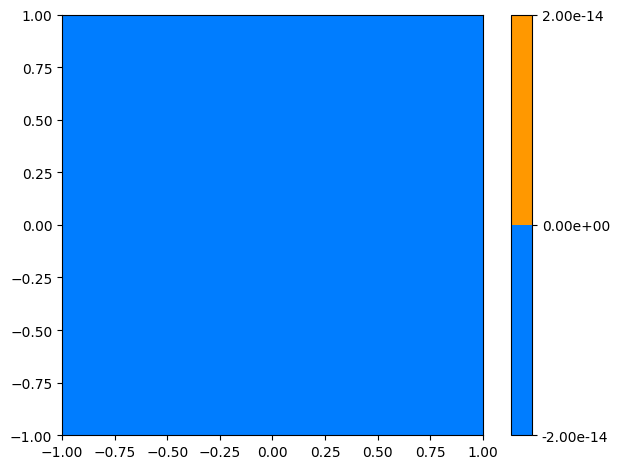

tensor([[8221.1543, 8221.1543, 8221.1543, 8221.1543, 8221.1543],
        [8221.1543, 8221.1543, 8221.1543, 8221.1543, 8221.1543],
        [8221.1543, 8221.1543, 8221.1543, 8221.1543, 8221.1543],
        [8221.1543, 8221.1543, 8221.1543, 8221.1543, 8221.1543],
        [8221.1543, 8221.1543, 8221.1543, 8221.1543, 8221.1543]]) tensor([[-0., -0., -0., -0., -0.],
        [-0., -0., -0., -0., -0.],
        [-0., -0., -0., -0., -0.],
        [-0., -0., -0., -0., -0.],
        [-0., -0., -0., -0., -0.]])


In [10]:
# Nota: como o vetor u é de 4D, para usar o ut é necessário fazer o permute das dimensões.

eps = 0.5 * (dd_dx + dd_dx.permute((1, 0, 2, 3)))

# Propriedades do material e tensor de material da 4° ordem

E = 210000.0
nu = 0.3

C = torch.zeros((2, 2, 2, 2))
# É o tensor de material da 4° ordem

C[0, 0, 0, 0] = 1.0
C[0, 0, 1, 1] = nu
C[1, 1, 0, 0] = nu
C[1, 1, 1, 1] = 1.0
C[0, 1, 0, 1] = (1.0 - nu) / 2.0
C = E / (1.0 - nu ** 2) * C

# Stress computational

sigma = torch.tensordot(C, eps)
# "torch.tensordot" é o comando para realizar o produto dos tensores.

# Cálculo de equilibrio

grad(  sigma[0, 0], x, torch.ones_like(x), create_graph=True, retain_graph=True, allow_unused=True)

# Create_graph = True, é utilizado quando se quer derivadas de ordens superiores (Ex:2° derivada)
# Retain_graph = True, é o comando para que o cálculo computacional fique na memoria.
# allow_unsed = True, é um comando para evitar erros, quando se há tensores que não são usados no output é retornado um erro (Este comando serve para evitar esse tipo de erro)

dsigma11_dx = grad(
    sigma[0, 0], x, torch.ones_like(x), create_graph=True, retain_graph=True, allow_unused=True
)[0]
dsigma12_dy = grad(
    sigma[0, 1], y, torch.ones_like(y), create_graph=True, retain_graph=True, allow_unused=True
)[0]
dsigma21_dx = grad(
    sigma[1, 0], x, torch.ones_like(x), create_graph=True, retain_graph=True, allow_unused=True
)[0]
dsigma22_dy = grad(
    sigma[1, 1], y, torch.ones_like(y), create_graph=True, retain_graph=True, allow_unused=True
)[0]

# Os valores entre [] após o sigma, significa a linha e a coluna, exemplo: Sigma[0, 0] é o componente da primeira linha e primeira coluna.
# Há [0] no final de cada linha, pois o objetivo é pegar o valor do gradiente dentro da tupla retornada (Muito útil para operações seguintes).

f = torch.zeros((2, nx, ny))

f[0] = -dsigma11_dx - dsigma12_dy
f[1] = -dsigma21_dx - dsigma22_dy

grad(sigma[1, 0], x, torch.ones_like(x), create_graph=True, retain_graph=True, allow_unused=True)

# Densidade computacional

g = 9810
rho = f[1] / g
print(rho)

fig, ax = plt.subplots()
cp = ax.contourf(x.detach(), y.detach(), rho.detach(), levels=12, cmap=plt.cm.jet)
fig.colorbar(cp, format="%.2e")
# É o comando para ver uma escala de cor e o formato "%.2e" significa que será na notação cientifica com 2 casas decimais
ax.set_aspect("equal")
fig.tight_layout()
plt.show()

#Estava avaliando os valores de f[0] e f[1]
print(f[0], f[1])